### 1. Giới thiệu dữ liệu


+ Bộ dữ liệu chứa thông tin khách hàng như:

    + ID, năm sinh, trình độ học vấn

    + Tình trạng hôn nhân, thu nhập, số con

    + Thông tin về chi tiêu, thời gian làm khách hàng, số lần mua sắm…

+ Mục tiêu của việc xử lý dữ liệu là làm sạch và chuẩn bị dữ liệu cho các phân tích thống kê và mô hình sau này.

In [8]:
# 1. Import thư viện và đọc dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc file dữ liệu
marketing_data = pd.read_csv("marketing_campaign.csv", sep='\t')

# Chọn các cột cần phân tích
marketing_data = marketing_data[['ID', 'Year_Birth', 'Education', 'Marital_Status',
    'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
    'Recency', 'MntWines', 'NumWebVisitsMonth']]

print("Kích thước dữ liệu mới:", marketing_data.shape)
print("\n5 dòng đầu tiên của dữ liệu đã chọn:")
print(marketing_data.head())

Kích thước dữ liệu mới: (2240, 11)

5 dòng đầu tiên của dữ liệu đã chọn:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  NumWebVisitsMonth  
0  04-09-2012       58       635                  7  
1  08-03-2014       38        11                  5  
2  21-08-2013       26       426                  4  
3  10-02-2014       26        11                  6  
4  19-01-2014       94       173                  5  


+ Kích thước: 2.240 dòng và 11 cột → dữ liệu khá lớn, đủ để phân tích thống kê và mô hình.

+ Các biến: gồm cả thông tin nhân khẩu học (ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome), thông tin khách hàng (Dt_Customer, Recency), và hành vi tiêu dùng (MntWines, NumWebVisitsMonth).

+ Dữ liệu 5 dòng đầu:

    + Có sự đa dạng về trình độ học vấn và tình trạng hôn nhân.

    + Thu nhập (Income) khác biệt khá lớn (ví dụ: 26.646 đến 71.613).

    + Số trẻ em (Kidhome, Teenhome) nhìn chung không lớn (0–1).

    + Biến Recency (gần nhất khách hàng mua hàng) và NumWebVisitsMonth cho thấy hành vi mua khác nhau.

Thông tin dữ liệu

In [9]:
print("\nThông tin dữ liệu:")
print(marketing_data.info())
print("\nSố lượng giá trị thiếu:\n", marketing_data.isnull().sum())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntWines           2240 non-null   int64  
 10  NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 192.6+ KB
None

Số lượng giá trị thiếu:
 ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome  

+ Dữ liệu gồm 2240 quan sát và 11 biến, trong đó có cả biến định tính (Education, Marital_Status) và định lượng (Income, Recency, MntWines, …).

+ Hầu hết các cột đều đầy đủ giá trị, ngoại trừ cột Income còn thiếu 24 giá trị.

+ Các biến số (Year_Birth, Recency, MntWines, …) đều ở dạng số nguyên, phù hợp cho phân tích thống kê.

+ Biến ngày (Dt_Customer) hiện ở dạng chuỗi (object), cần chuyển sang kiểu datetime để phân tích theo thời gian.

### 2. Loại bỏ dữ liệu trùng lặp

+ Thực hiện loại bỏ các bản ghi bị trùng lặp để tránh sai lệch kết quả phân tích.

+ Ngoài ra, có thể xóa một số dòng hoặc cột không cần thiết bằng phương thức drop().

In [10]:
before = marketing_data.shape[0]
marketing_data = marketing_data.drop_duplicates()
after = marketing_data.shape[0]
print(f"\nĐã loại bỏ {before - after} dòng trùng lặp.")


Đã loại bỏ 0 dòng trùng lặp.


### 3. Thay thế và chuẩn hóa dữ liệu

+ Với cột Teenhome, thay thế giá trị số (0, 1, 2) thành dạng nhãn có ý nghĩa: "has no teen" và "has teen".

+ Với cột Income, thay thế các giá trị khuyết (NaN) bằng 0 và chuyển kiểu dữ liệu từ float sang int.

In [11]:
# Teenhome: thay số bằng nhãn
marketing_data['Teenhome_label'] = marketing_data['Teenhome'].replace(
    {0:'has no teen', 1:'has teen', 2:'has teen'}
)

# Income: thay NA bằng 0, đổi sang int
marketing_data['Income'] = marketing_data['Income'].fillna(0).astype(int)

# Chuyển cột Dt_Customer sang datetime
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], errors='coerce')


### 4. Xử lý dữ liệu thiếu

+ Kiểm tra số lượng giá trị thiếu bằng isnull().sum().

+ Loại bỏ các dòng chứa giá trị thiếu bằng phương thức dropna().

+ Sau xử lý, dữ liệu đã hoàn chỉnh, sẵn sàng cho bước phân tích tiếp theo.

In [12]:
print("\nSố lượng giá trị thiếu sau khi xử lý:")
print(marketing_data.isnull().sum())

# Nếu muốn loại bỏ các dòng còn thiếu
marketing_data_clean = marketing_data.dropna()
print("Kích thước dữ liệu sau khi loại bỏ NA:", marketing_data_clean.shape)



Số lượng giá trị thiếu sau khi xử lý:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer          1324
Recency                 0
MntWines                0
NumWebVisitsMonth       0
Teenhome_label          0
dtype: int64
Kích thước dữ liệu sau khi loại bỏ NA: (916, 12)


### 5. Thống kê mô tả & trực quan cơ bản


Thống kê mô tả:
                 ID   Year_Birth         Income     Kidhome    Teenhome  \
count    916.000000   916.000000     916.000000  916.000000  916.000000   
mean    5789.707424  1968.980349   52789.858079    0.451965    0.512009   
min        0.000000  1940.000000       0.000000    0.000000    0.000000   
25%     2926.000000  1959.000000   34421.000000    0.000000    0.000000   
50%     5853.500000  1971.000000   52541.000000    0.000000    0.000000   
75%     8640.250000  1978.000000   68655.000000    1.000000    1.000000   
max    11191.000000  1996.000000  666666.000000    2.000000    2.000000   
std     3258.724478    11.810139   30603.577397    0.548108    0.546092   

                         Dt_Customer     Recency     MntWines  \
count                            916  916.000000   916.000000   
mean   2013-07-01 05:36:25.152838656   48.764192   306.784934   
min              2012-01-08 00:00:00    0.000000     0.000000   
25%              2013-01-05 18:00:00   24.00000

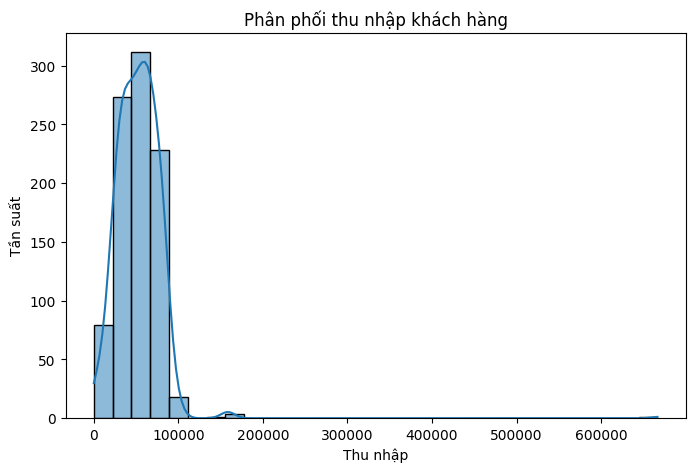

In [ ]:
print("\nThống kê mô tả:")
print(marketing_data_clean.describe())

# Vẽ phân phối thu nhập
plt.figure(figsize=(8,5))
sns.histplot(marketing_data_clean['Income'], bins=30, kde=True)
plt.title("Phân phối thu nhập khách hàng")
plt.xlabel("Thu nhập")
plt.ylabel("Tần suất")
plt.show()